In [ ]:
import h2o
import numpy as np
import pandas as pd

In [2]:
h2o.init()



No instance found at ip and port: localhost:54321. Trying to start local jar...


JVM stdout: /tmp/tmpQPjdVn/h2o_fp7y_started_from_python.out
JVM stderr: /tmp/tmp5YXRh_/h2o_fp7y_started_from_python.err
Using ice_root: /tmp/tmpUNF_Ca


Java Version: java version "1.7.0_95"
Java(TM) SE Runtime Environment (build 1.7.0_95-b14)
Java HotSpot(TM) 64-Bit Server VM (build 24.95-b01, mixed mode)


Starting H2O JVM and connecting: ................... Connection successful!


H2O cluster uptime:,2 seconds 372 milliseconds
H2O cluster version:,3.8.2.2
H2O cluster name:,H2O_started_from_python_fp7y_wrs792
H2O cluster total nodes:,1
H2O cluster total free memory:,26.6 GB
H2O cluster total cores:,96
H2O cluster allowed cores:,96
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


### Load data in

In [3]:
data = h2o.import_file('covtype.csv')
data.head()


Parse Progress: [##################################################] 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
## SET THE COLUMN NAMES:

## Different attributes ==============:
#Elevation                               quantitative    meters                       Elevation in meters
#Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
#Slope                                   quantitative    degrees                      Slope in degrees
#Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
#Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
#Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
#Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
#Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
#Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
#Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
#Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
#Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
#Cover_Type (7 types)

first_cols = ['elevation','aspect','slope','hz_dist_to_hyd','vr_dist_to_hyd',
              'hz_dist_to_rds','shade_9am','shade_12pm','shade_3pm',
              'hz_dist_to_fire_pt']
w_a = ['wild_area_'+`i` for i in range(4)]
s_t = ['soil_type_'+`i` for i in range(40)]
last_col = ['target']

## Reduce all, add to the headers:
data.columns = reduce(lambda x,y: x + y, [first_cols, w_a, s_t, last_col])
data.head()

elevation,aspect,slope,hz_dist_to_hyd,vr_dist_to_hyd,hz_dist_to_rds,shade_9am,shade_12pm,shade_3pm,hz_dist_to_fire_pt,wild_area_0,wild_area_1,wild_area_2,wild_area_3,soil_type_0,soil_type_1,soil_type_2,soil_type_3,soil_type_4,soil_type_5,soil_type_6,soil_type_7,soil_type_8,soil_type_9,soil_type_10,soil_type_11,soil_type_12,soil_type_13,soil_type_14,soil_type_15,soil_type_16,soil_type_17,soil_type_18,soil_type_19,soil_type_20,soil_type_21,soil_type_22,soil_type_23,soil_type_24,soil_type_25,soil_type_26,soil_type_27,soil_type_28,soil_type_29,soil_type_30,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,target
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


We need to transform the 'target' feature to be categorical:

In [5]:
data['target'] = data['target'].asfactor()
data.head()

elevation,aspect,slope,hz_dist_to_hyd,vr_dist_to_hyd,hz_dist_to_rds,shade_9am,shade_12pm,shade_3pm,hz_dist_to_fire_pt,wild_area_0,wild_area_1,wild_area_2,wild_area_3,soil_type_0,soil_type_1,soil_type_2,soil_type_3,soil_type_4,soil_type_5,soil_type_6,soil_type_7,soil_type_8,soil_type_9,soil_type_10,soil_type_11,soil_type_12,soil_type_13,soil_type_14,soil_type_15,soil_type_16,soil_type_17,soil_type_18,soil_type_19,soil_type_20,soil_type_21,soil_type_22,soil_type_23,soil_type_24,soil_type_25,soil_type_26,soil_type_27,soil_type_28,soil_type_29,soil_type_30,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,target
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Create splits
One thing we have to watch for with so many multivariate targets is that there's no substantial class imbalance that will affect our split: 

In [6]:
def value_counts(dat, nm):
    print h2o.as_list(dat[nm])[nm].value_counts()
    
value_counts(data, 'target')

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: target, dtype: int64


It *does* appear to have some significant class imbalance issues. We will need to ensure after the splits that each class is represented in the splits, and that when modeling, we use h2o's `balance_classes = True` option. I like to create 3 splits (train, validation, holdout), use the validation as the `validation_frame` in h2o, select the model that maximizes `auc` on the validation set, and then finally run against the holdout for the final score.

In [7]:
## Create the masks (we want a 60/20/20 split):
rands = np.random.rand(data.shape[0])
rng = np.array(range(data.shape[0]))

holdout_msk    = rng[rands < 0.2]
validation_msk = rng[(rands < 0.4) & (rands >= 0.2)]
train_msk      = rng[rands >= 0.4]

In [8]:
## Get the training set:
train_X = data[train_msk.tolist(),:]
value_counts(train_X, 'target')

2    170036
1    126997
3     21507
7     12347
6     10405
5      5661
4      1670
Name: target, dtype: int64


In [9]:
## Get the validation set:
validation_X = data[validation_msk.tolist(),:]
value_counts(validation_X, 'target')

2    56426
1    42476
3     7063
7     4107
6     3431
5     1889
4      577
Name: target, dtype: int64


In [10]:
## Get the holdout set:
holdout_X = data[holdout_msk.tolist(),:]
value_counts(holdout_X, 'target')

2    56839
1    42367
3     7184
7     4056
6     3531
5     1943
4      500
Name: target, dtype: int64


In [11]:
## Now we need to split off all the Y variables!!
train_y      = train_X.pop('target')
validation_y = validation_X.pop('target')
holdout_y    = holdout_X.pop('target')

In [12]:
## Define a function to "listify" a column
def listify(x):
    l = h2o.as_list(x)
    return l[l.columns[0]]

## Examine some of the continuous features
Some features might have significant skew; let's determine whether we should transform. Since **there are relatively few continuous features** in this dataset, this is feasible. In many problems, it may not be feasible to look at every feature to approximate transformations. I'm a big fan of the BoxCox or YeoJohnson power transformations in many cases.

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

def simple_hist(x, xlab = ''):
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
    plt.xlabel(xlab)
    plt.show()

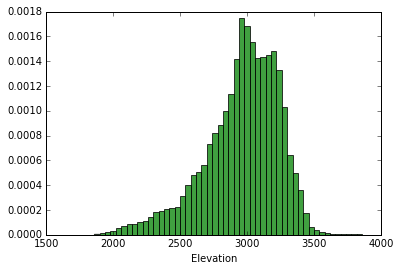

In [16]:
## View elevation:
simple_hist(listify(train_X['elevation']), xlab = 'Elevation')

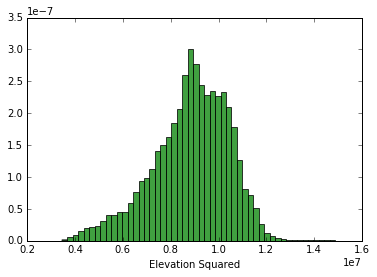

In [17]:
## Elevation seems slightly left-skewed (longer tail on left). We can try a power transformation:
sq_elevation = listify(train_X['elevation']).apply(lambda x: x**2)
simple_hist(sq_elevation, xlab = 'Elevation Squared')

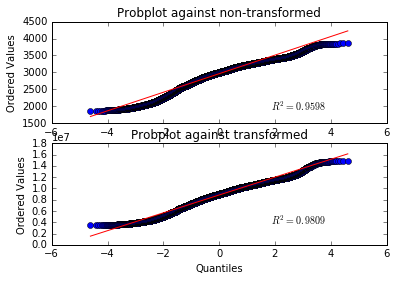

In [18]:
## Define plotter to examine normality:
from scipy import stats

def examine_transform(x1, x2):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(x1, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against non-transformed')

    ax2 = fig.add_subplot(212)
    prob = stats.probplot(x2, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot against transformed')
    
examine_transform(listify(train_X['elevation']), sq_elevation)

That seems to work well. If more features need transformations like this, it would be wise to build a `TransformerMixin` that will allow us to transform different features at different powers. Let's examine more:

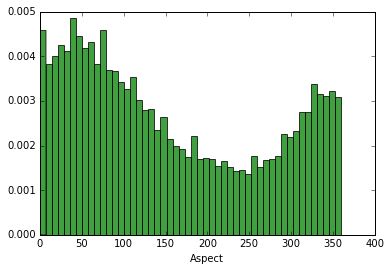

In [19]:
simple_hist(listify(train_X['aspect']), xlab = 'Aspect')

This one almost looks like it might be binomial...

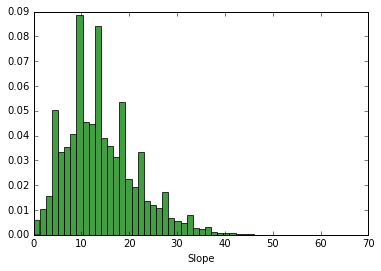

In [20]:
## Let's look at slope.
simple_hist(listify(train_X['slope']), xlab = 'Slope')

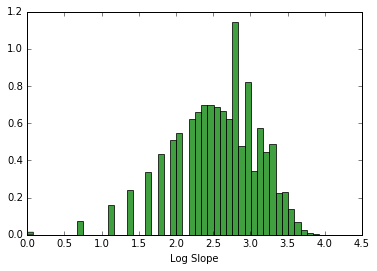

In [21]:
## It looks like a log transformation may be beneficial here... we need to truncate any negatives to zero and add one.
slope_trans = listify(train_X['slope']).apply(lambda x: np.log(np.max(x,0) + 1))
simple_hist(slope_trans, xlab = 'Log Slope')

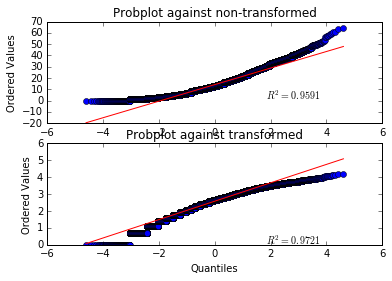

In [23]:
examine_transform(listify(train_X['slope']), slope_trans)

This looks a little bizarre, but our R^2 is claiming we've made the feature more normal.

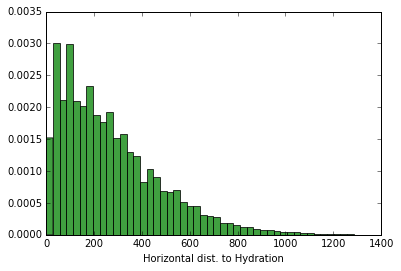

In [24]:
simple_hist(listify(train_X['hz_dist_to_hyd']), 'Horizontal dist. to Hydration')

This appears to be either negative binomial or Poisson... we should definitely try to make this more normal.

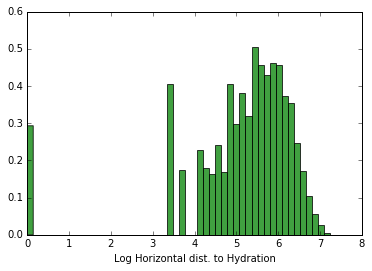

In [25]:
trans_hz_hyd = listify(train_X['hz_dist_to_hyd']).apply(lambda x: np.log(np.max(x,0) + 1))
simple_hist(trans_hz_hyd, xlab = 'Log Horizontal dist. to Hydration')

Log transformation doesn't seem to work too well, here...

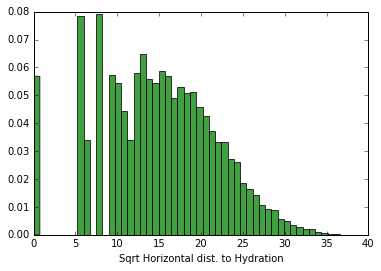

In [26]:
trans_hz_hyd = listify(train_X['hz_dist_to_hyd']).apply(lambda x: x**0.5)
simple_hist(trans_hz_hyd, xlab = 'Sqrt Horizontal dist. to Hydration')

This looks a bit better, though the sparsity at the left tail is slightly concerning. The normplot below doesn't seem to support that we should go with this transformation (even though the R^2 is 0.99). Thus, we will not transform this feature.

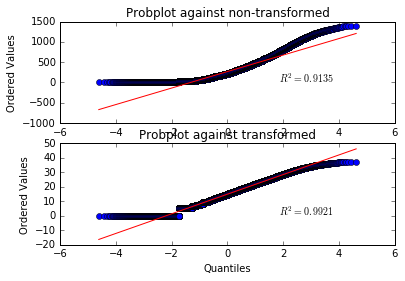

In [27]:
examine_transform(listify(train_X['hz_dist_to_hyd']), trans_hz_hyd)

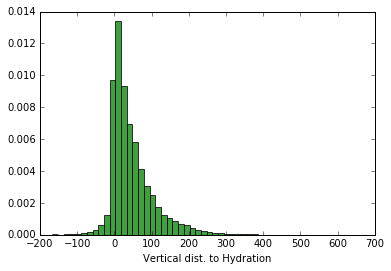

In [28]:
simple_hist(listify(train_X['vr_dist_to_hyd']), 'Vertical dist. to Hydration')

This actually looks pretty good, let's leave it for now.

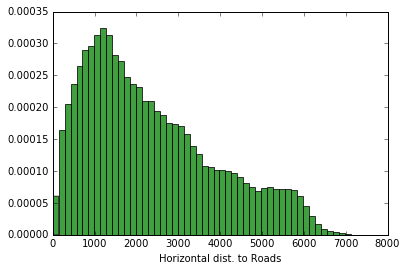

In [29]:
simple_hist(listify(train_X['hz_dist_to_rds']), 'Horizontal dist. to Roads')

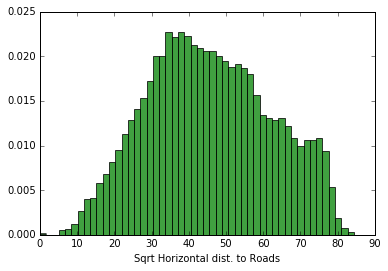

In [30]:
trans_hz_dist_to_rds = listify(train_X['hz_dist_to_rds']).apply(lambda x: x**0.5)
simple_hist(trans_hz_dist_to_rds, 'Sqrt Horizontal dist. to Roads')

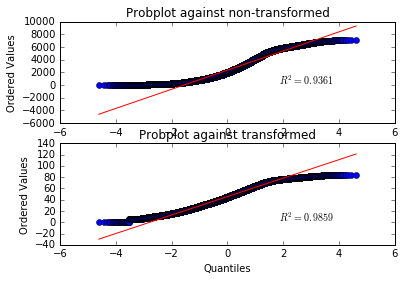

In [31]:
examine_transform(listify(train_X['hz_dist_to_rds']), trans_hz_dist_to_rds)

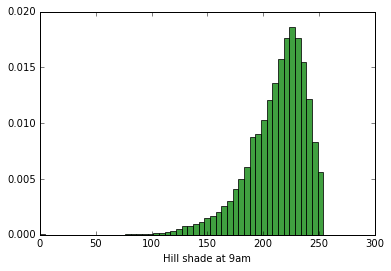

In [32]:
simple_hist(listify(train_X['shade_9am']), 'Hill shade at 9am')

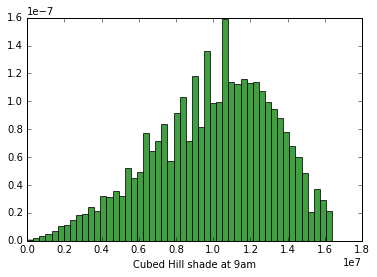

In [33]:
trans_shade_9 = listify(train_X['shade_9am']).apply(lambda x: x ** 3)
simple_hist(trans_shade_9, 'Cubed Hill shade at 9am')

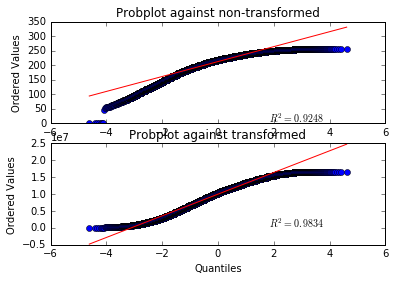

In [34]:
examine_transform(listify(train_X['shade_9am']), trans_shade_9)

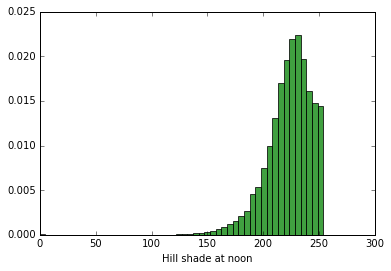

In [35]:
simple_hist(listify(train_X['shade_12pm']), 'Hill shade at noon')

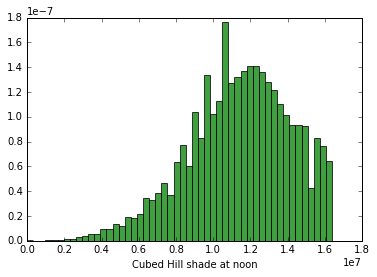

In [36]:
trans_shade_12 = listify(train_X['shade_12pm']).apply(lambda x: x ** 3)
simple_hist(trans_shade_12, 'Cubed Hill shade at noon')

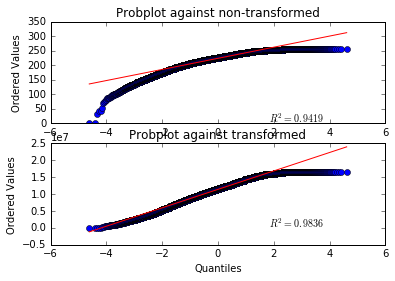

In [37]:
examine_transform(listify(train_X['shade_12pm']), trans_shade_12)

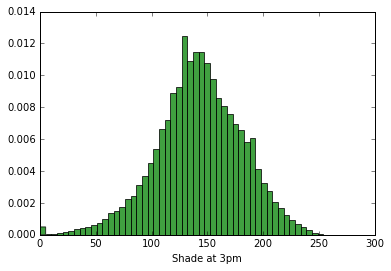

In [38]:
simple_hist(listify(train_X['shade_3pm']), 'Shade at 3pm')

This one looks nearly perfectly normal!

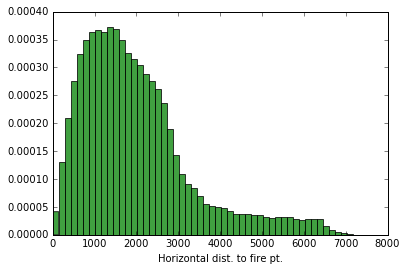

In [39]:
simple_hist(listify(train_X['hz_dist_to_fire_pt']), 'Horizontal dist. to fire pt.')

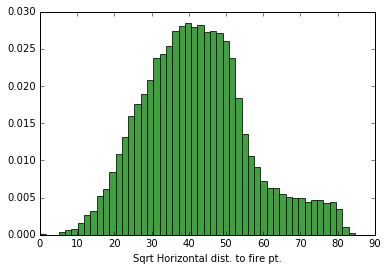

In [40]:
trans_fire_pt = listify(train_X['hz_dist_to_fire_pt']).apply(lambda x: x ** 0.5)
simple_hist(trans_fire_pt, 'Sqrt Horizontal dist. to fire pt.')

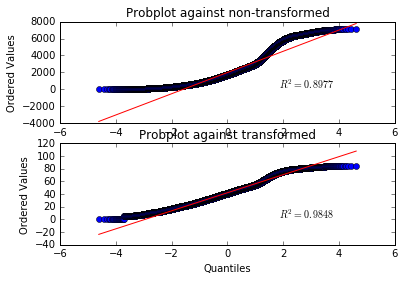

In [41]:
examine_transform(listify(train_X['hz_dist_to_fire_pt']), trans_fire_pt)

In [14]:
## Define the powers we want to use

powers = [
 2.0,     # elevation needs a sq transform
 1.0,     # aspect is binomial; let's not touch that one
 np.nan,  # nan will denote a log transform
 1.0,     # don't touch hz_dist_to_hyd
 1.0,     # don't touch vr_dist_to_hyd
 0.5,     # sqrt for hz_dist_to_rds
 3.0,     # cb trans for shade_9am
 3.0,     # cb trans for shade_12pm
 1.0,     # shade_3pm was nearly perfectly normal
 0.5      # last one... use a sqrt
]

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from h2o import H2OFrame

## CREATE THE POWER TRANSFORMER FOR PIPELINE:
class PowerTransformer(BaseEstimator, TransformerMixin):
    """Transform a subset of names by corresponding powers.
    
    Parameters
    ----------
    nms : array_like, str
        A list of names
        
    pwrs : array_like, float
        A list of powers
        
    Attributes
    ----------
    pwr : dict
        Maps name to its power
    """
    
    def __init__(self, nms, pwrs):
        ## validate same length:
        if not len(nms) == len(pwrs):
            raise ValueError('dim mismatch')
        self.pwr = dict(zip(nms, pwrs))
            
    def fit(self, X, y = None):
        """
        Parameters
        ----------
        X : h2o frame
        Y : passthrough for pipeline
        """
        ## This is already fit in constructor
        return self
    
    def transform(self, X, y = None):
        """Perform the transformation IN PLACE!!!!!!
        
        Parameters
        ----------
        X : h2o frame
        y : pass through for Pipeline
        """
        if not all([nm in X.columns for nm in self.pwr.keys()]):
            raise ValueError('not all names are in provided X')
        
        for k,v in self.pwr.iteritems():
            ## this is a hacky way of setting cols in place...
            nvals = H2OFrame(listify(X[k])
                             .apply(lambda x: x**v if not np.isnan(v) else np.log(np.max(x, 0) + 1))
                             .values[np.newaxis].T)
            
            nvals.columns = [k]
            X[k] = nvals[k]
    
        return X

In [16]:
from sklearn.utils.validation import check_is_fitted

## This acts as a standard scaler, but only on the provided names
class H2OStandardScaler(BaseEstimator, TransformerMixin):
    """Standard scales the provided features IN PLACE!!!"""
    
    def __init__(self, nms):
        self.nms_ = nms
        
    def fit(self, X, y = None):
        self.means_ = {}
        self.stdevs_= {}
        
        ## don't validate names, just let it fail through
        for nm in self.nms_:
            col = listify(X[nm]) ## will break here if no name exists
            self.means_[nm] = np.mean(col)
            self.stdevs_[nm]= np.std(col)
        
        return self
    
    def transform(self, X, y = None):
        check_is_fitted(self, 'means_')
        
        ## Transform in place!
        for nm in self.nms_:
            col = listify(X[nm]) ## Breaks if no nm matches
            col -= self.means_[nm]
            col /= self.stdevs_[nm]
            
            ## Now create the new frame...
            nvals = H2OFrame(col.values[np.newaxis].T)
            nvals.columns = [nm]
            
            X[nm] = nvals[nm] ## ensure set
            
        return X
    
    
## We are going to use H2O's models and grid search, so we need to include
## an estimator at the end of the pipeline just to fit the API:
class PassThroughEstimator(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y= None):
        pass
    
    def predict(self, X):
        return X

### Create our preprocessing pipeline:

In [ ]:
from sklearn.pipeline import Pipeline

## Fit pipeline:
pipeline = Pipeline([
        ('power', PowerTransformer(first_cols, powers)),
        ('scaler', H2OStandardScaler(first_cols)),
        ('estimator', PassThroughEstimator())
    ]).fit(train_X)

In [18]:
## Assert train_X already transformed:
train_X.head()

elevation,aspect,slope,hz_dist_to_hyd,vr_dist_to_hyd,hz_dist_to_rds,shade_9am,shade_12pm,shade_3pm,hz_dist_to_fire_pt,wild_area_0,wild_area_1,wild_area_2,wild_area_3,soil_type_0,soil_type_1,soil_type_2,soil_type_3,soil_type_4,soil_type_5,soil_type_6,soil_type_7,soil_type_8,soil_type_9,soil_type_10,soil_type_11,soil_type_12,soil_type_13,soil_type_14,soil_type_15,soil_type_16,soil_type_17,soil_type_18,soil_type_19,soil_type_20,soil_type_21,soil_type_22,soil_type_23,soil_type_24,soil_type_25,soil_type_26,soil_type_27,soil_type_28,soil_type_29,soil_type_30,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39
-0.608856,-0.14959,-0.503553,-0.00747752,0.316955,0.655794,0.87731,0.760093,-0.198039,2.51924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1.31488,-0.989354,-2.68896,-0.548093,-0.814066,-1.5664,0.20741,0.516875,0.193891,2.54193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-1.27908,-0.989354,-0.908595,0.00192449,-0.711246,-1.23956,0.29809,-0.000691609,-0.119653,2.57909,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-1.28234,-0.953619,-1.76173,-0.167312,-0.676973,-1.31373,0.29809,0.281831,0.0371189,2.56673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-1.24313,-0.989354,-0.503553,-0.139106,0.162725,-1.20027,0.344047,-0.217854,-0.250296,2.5738,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-1.25949,-0.864283,-0.330549,-0.106199,-0.608426,-1.23595,0.58008,-0.323531,-0.485454,2.56762,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-0.824001,-0.194258,1.00831,-0.562196,0.385502,0.674576,1.63236,-0.0557135,-1.32157,2.50585,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
-1.63335,-0.935752,-0.908595,-1.0699,-0.762656,-1.10222,0.390418,-0.000691609,-0.145782,2.27063,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1.26603,0.922448,-3.42495,-0.703226,-0.814066,-1.27125,0.0309377,0.822191,0.481306,2.50808,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
-1.56436,-0.748145,-0.908595,-0.867761,-0.694109,-1.2861,0.58008,0.110828,-0.250296,2.28509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Begin modeling:
I like to start with a nice baseline RF, and then move into GBM tuning. **It's worth noting that the baseline classification accuracy for this dataset ranges from 0.58 - 0.71 according to the UCI repository:** http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info

In [ ]:
## Transform:
train_trans = train_X ## pipeline.predict(train_X) -- train_X has been transformed already, as it happens IN PLACE
val_trans   = pipeline.predict(validation_X)
hold_trans  = pipeline.predict(holdout_X)

In [22]:
## re-attach the target
train_trans['target'] = train_y
val_trans['target']   = validation_y
hold_trans['target']  = holdout_y

In [37]:
## Set the x, y names, view the header:
x = train_trans.names[:-1]
y = 'target'

train_trans.head()

elevation,aspect,slope,hz_dist_to_hyd,vr_dist_to_hyd,hz_dist_to_rds,shade_9am,shade_12pm,shade_3pm,hz_dist_to_fire_pt,wild_area_0,wild_area_1,wild_area_2,wild_area_3,soil_type_0,soil_type_1,soil_type_2,soil_type_3,soil_type_4,soil_type_5,soil_type_6,soil_type_7,soil_type_8,soil_type_9,soil_type_10,soil_type_11,soil_type_12,soil_type_13,soil_type_14,soil_type_15,soil_type_16,soil_type_17,soil_type_18,soil_type_19,soil_type_20,soil_type_21,soil_type_22,soil_type_23,soil_type_24,soil_type_25,soil_type_26,soil_type_27,soil_type_28,soil_type_29,soil_type_30,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,target
-0.608856,-0.14959,-0.503553,-0.00747752,0.316955,0.655794,0.87731,0.760093,-0.198039,2.51924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
-1.31488,-0.989354,-2.68896,-0.548093,-0.814066,-1.5664,0.20741,0.516875,0.193891,2.54193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-1.27908,-0.989354,-0.908595,0.00192449,-0.711246,-1.23956,0.29809,-0.000691609,-0.119653,2.57909,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-1.28234,-0.953619,-1.76173,-0.167312,-0.676973,-1.31373,0.29809,0.281831,0.0371189,2.56673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-1.24313,-0.989354,-0.503553,-0.139106,0.162725,-1.20027,0.344047,-0.217854,-0.250296,2.5738,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-1.25949,-0.864283,-0.330549,-0.106199,-0.608426,-1.23595,0.58008,-0.323531,-0.485454,2.56762,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-0.824001,-0.194258,1.00831,-0.562196,0.385502,0.674576,1.63236,-0.0557135,-1.32157,2.50585,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
-1.63335,-0.935752,-0.908595,-1.0699,-0.762656,-1.10222,0.390418,-0.000691609,-0.145782,2.27063,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
-1.26603,0.922448,-3.42495,-0.703226,-0.814066,-1.27125,0.0309377,0.822191,0.481306,2.50808,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
-1.56436,-0.748145,-0.908595,-0.867761,-0.694109,-1.2861,0.58008,0.110828,-0.250296,2.28509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


### Define function that prints accuracy scores for train, val, holdout:

In [94]:
def score(model, train, val, hold = None):
    tp = model.predict(train)
    vp = model.predict(val)
    
    print '\n'
    print 'Train accuracy:      %.5f' % accuracy_score(listify(train['target']).values,   listify(tp['predict']).values)
    print 'Validation accuracy: %.5f' % accuracy_score(listify(val['target']).values,     listify(vp['predict']).values)
    
    if not hold is None:
        hp = model.predict(hold)
        print 'Hold-out accuracy:   %.5f' % accuracy_score(listify(hold['target']).values,listify(hp['predict']).values)
    

## RF

In [83]:
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score

## Just run a normal, out-of-the-box RF:
rf = H2ORandomForestEstimator()
rf.train(x = x, y = y, training_frame = train_trans, validation_frame = val_trans, nfolds = 5)
score(rf, train_trans, val_trans)


drf prediction Progress: [##################################################] 100%

drf prediction Progress: [##################################################] 100%


Train accuracy:      0.95610
Validation accuracy: 0.92334


This is really fantastic performance for a non-balanced estimator... Let's balance and re-run

In [84]:
rf2 = H2ORandomForestEstimator(balance_classes=True)
rf2.train(x = x, y = y, training_frame = train_trans, validation_frame = val_trans, nfolds = 5)
score(rf2, train_trans, val_trans)


drf prediction Progress: [##################################################] 100%

drf prediction Progress: [##################################################] 100%


Train accuracy:      0.95202
Validation accuracy: 0.91073


It looks like balancing classes actually impedes the performances of our estimator on the validation set. Thus, our best RF estimator is going to be our first model.

### GBM:

In [87]:
from h2o.grid import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator

## GBM is much harder to tune than RandomForest, thus I'm going to go straight to a gridsearch...
hyper_params = { 
    'max_trees' : [50,100,150], 
    'max_depth' : range(1,6), ## grow a GBM shallow, anticipate optimal to be 2-3
    'learn_rate' : [0.01, 0.05, 0.5, 1], ## lower learn rates should be wider...
}

grid = H2OGridSearch(H2OGradientBoostingEstimator, hyper_params = hyper_params)
grid.train(x = x, y = y, training_frame = train_trans, validation_frame = val_trans, nfolds = 5)
grid.show()


gbm Grid Build Progress: [##################################################] 100%
      ntrees  max_depth  learn_rate  \
0         50          5        0.50   
1        100          4        0.50   
2        150          4        0.50   
3         50          4        0.50   
4        150          5        0.05   
5        100          5        0.05   
6         50          3        0.50   
7        150          2        0.50   
8        150          4        0.05   
9        100          2        0.50   
10       100          4        0.05   
11        50          2        0.50   
12       150          3        0.05   
13       100          5        0.50   
14        50          5        0.05   
15       100          3        0.05   
16       150          1        0.50   
17       100          1        0.50   
18       150          2        0.05   
19        50          4        0.05   
20        50          1        0.50   
21       100          2        0.05   
22        50       

In [88]:
## Score each model...
for i, model in enumerate(grid.models):
    print "MODEL %i" % i
    score(model, train_trans, val_trans)
    model._plot('number_of_trees', 'logloss') # auc throws a keyerror...
    print '\n\n\n' # just want better spacing.

MODEL 0

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.88030
Validation accuracy: 0.86825




MODEL 1

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.87572
Validation accuracy: 0.86271




MODEL 2

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.88143
Validation accuracy: 0.86857




MODEL 3

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.84422
Validation accuracy: 0.83623




MODEL 4

gbm prediction Progress: [#####

Model 13 looks the best... let's plot it:

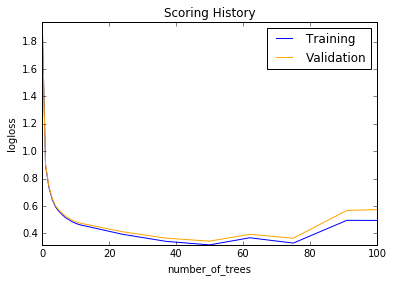

In [89]:
grid.models[13]._plot('number_of_trees', 'logloss')

Looks like we start overfitting around 50... Let's fit the same model with 50

In [92]:
best_gbm = H2OGradientBoostingEstimator(ntrees=50, max_depth=5, learn_rate=0.5)
best_gbm.train(x = x, y = y, training_frame = train_trans, validation_frame = val_trans, nfolds = 5)
score(best_gbm, train_trans, val_trans)


gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.88030
Validation accuracy: 0.86825


###Let's select our final model...

In [95]:
score(rf,       train_trans, val_trans, hold_trans)
score(best_gbm, train_trans, val_trans, hold_trans)


drf prediction Progress: [##################################################] 100%

drf prediction Progress: [##################################################] 100%


Train accuracy:      0.95610
Validation accuracy: 0.92334

drf prediction Progress: [##################################################] 100%
Hold-out accuracy:   0.92410

gbm prediction Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%


Train accuracy:      0.88030
Validation accuracy: 0.86825

gbm prediction Progress: [##################################################] 100%
Hold-out accuracy:   0.86997


In [96]:
final_model = rf
final_predictions = rf.predict(hold_trans)['predict']
final_predictions


drf prediction Progress: [##################################################] 100%


predict
2
5
5
2
5
5
5
2
2
2
